## Team ID = PTID-CDS-JAN 22 -1273
##  Project ID = PRCP-1003

### Problem Statemen= Predicting the customer transaction irrespective of money transacted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('train(1).csv')

In [3]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
 print(" The count of missing values in df:",df.isnull().sum().sum())


 The count of missing values in df: 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [8]:
df.shape

(200000, 202)

In [7]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# EDA

The dataset  column contains around 200  transaction done by the customer.
The dataset  row  contains around two lakh different type of customer.
Here we are going to predict  the outcome with repect to the target variables given in the dataset which has two classes where,
0---> means the customer will not transact in the future
1---> means the customer  will transact in the future 
when we looked into the target value counts ,we found dataset was having  some bias  towards the class -->0, in which the count of this class was 89.9% , from the total target samples.



In [9]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)
df.iloc[:1,:]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,-4.92,5.747,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.284,30.7133,10.535,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.192,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.017,5.9226,-14.2136,16.0283,5.3253,12.9194,29.046,-0.694,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.959,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.701,21.6374,0.5663,5.1999,8.86,43.1127,18.3816,-2.344,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.71,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.524,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.78,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.676,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.691,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914


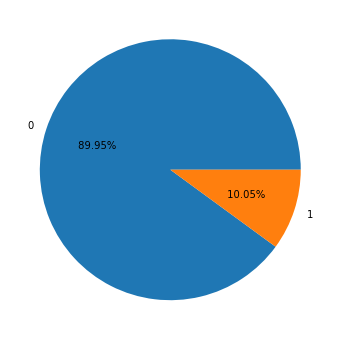

In [10]:
target_name= df.target.value_counts().index
target_values= df.target.value_counts().values
plt.rcParams['figure.figsize']=(12,6)
plt.pie(x=target_values,labels=target_name,autopct=" %1.2f%%")
plt.show()

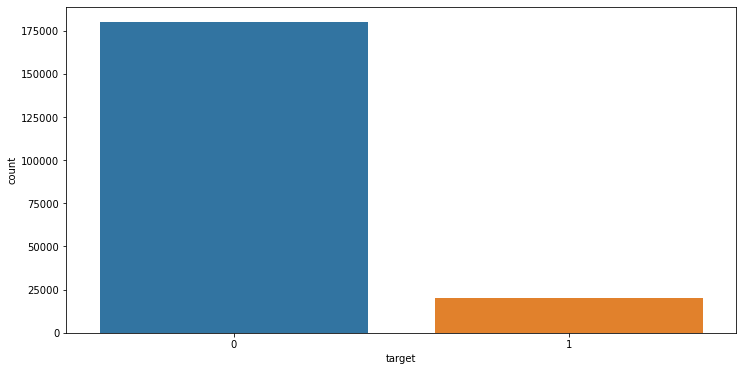

In [11]:
sns.countplot(x= df.target)
plt.show()

####  Observation:

The target data represents whether the customer will make transaction in future 0 represents ---> Not transact and 1 represenst will transact.Based on this inference through vizualization the data is imbalanced and dominated by customer will not transact in future.

In [12]:
print('The target value 0 count:',(df['target']==0).sum())
print('The target value 1 count:',(df['target']==1).sum())

The target value 0 count: 179902
The target value 1 count: 20098


<AxesSubplot:xlabel='target', ylabel='Density'>

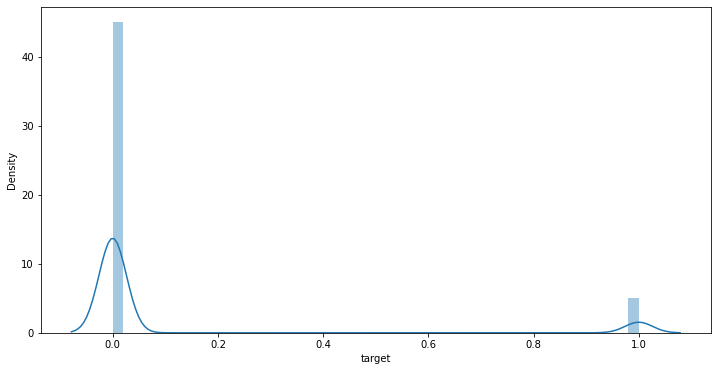

In [13]:
sns.distplot(df.target)

# Outlier Analysis : Boxplots

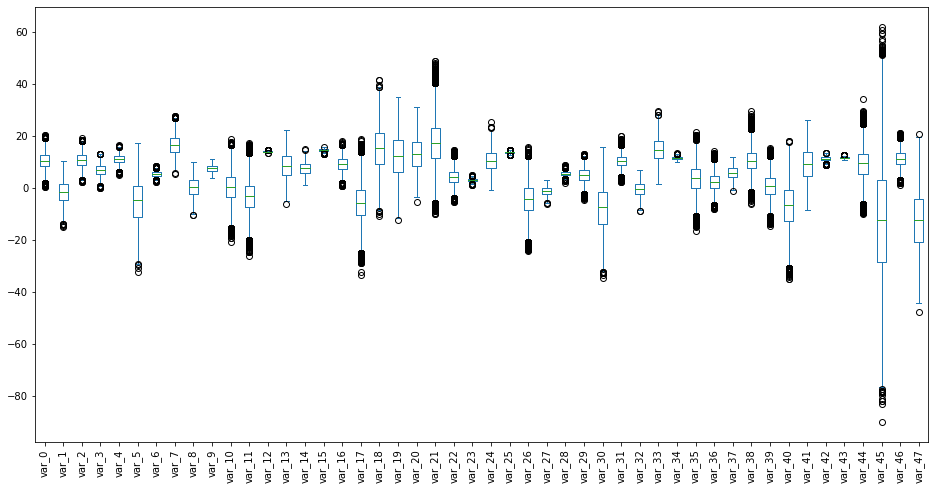

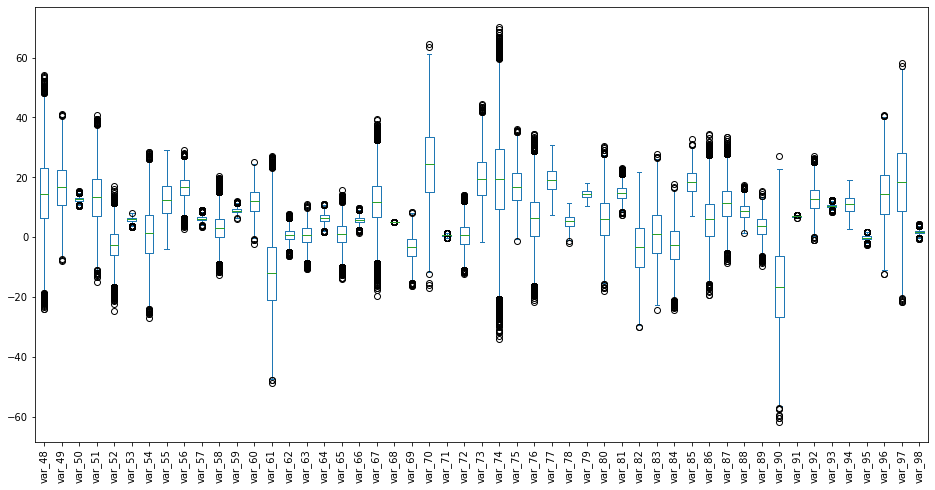

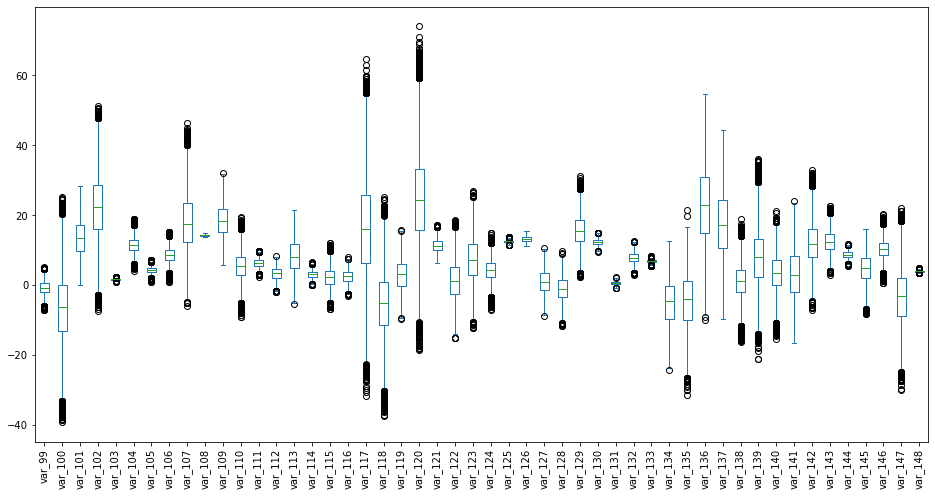

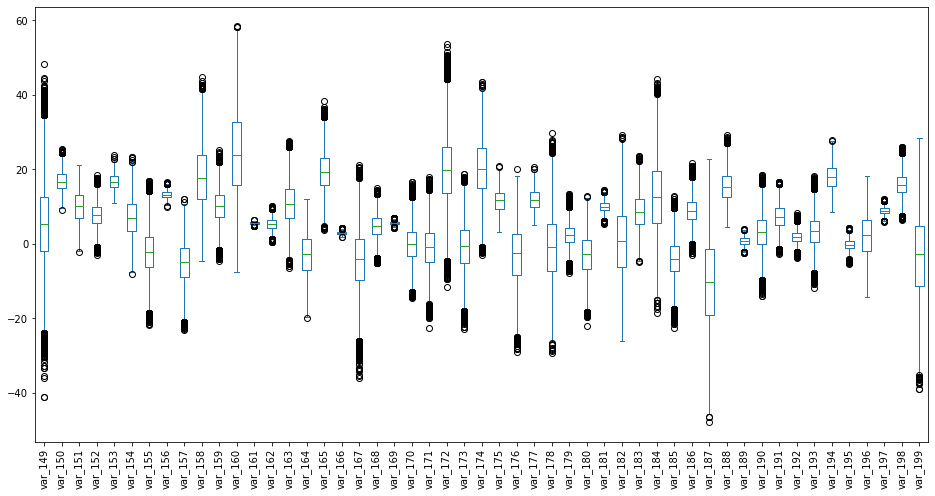

In [14]:

df.iloc[:, 2:50].plot(kind='box', figsize=[16,8])
plt.xticks(rotation=90)
df.iloc[:, 50:101].plot(kind='box', figsize=[16,8])
plt.xticks(rotation=90)
df.iloc[:, 101:151].plot(kind='box', figsize=[16,8])
plt.xticks(rotation=90)
df.iloc[:, 151:].plot(kind='box', figsize=[16,8])
plt.xticks(rotation=90)
plt.show()

#### Observation:
We follow tradionally finding the outliers in the  variables,though we found outliers in the variables we are not going to remove or cap  them  in the dataset .since those variables  have  the values which are related to individual customer transaction.

# Data preprocessing

In [15]:
X= df.drop(['target','ID_code'],axis=1)
y= df.loc[:,['target']]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.30,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
from time import time
classifier = [LogisticRegression(),
              RandomForestClassifier(),
              BaggingClassifier(),
              AdaBoostClassifier(),
              ExtraTreesClassifier(),
              GradientBoostingClassifier(),
              DecisionTreeClassifier(),
              KNeighborsClassifier(),
              XGBClassifier(),LGBMClassifier()]


head = 11
for model in classifier[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred_train = model.predict(X_train)
    y_pred_test=model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tPrecison score test:", precision_score(y_test, y_pred_test))
    print("\tPrecison score train:", precision_score(y_train, y_pred_train))
    print("\t recall score test:", recall_score(y_test, y_pred_test))
    print("\t recall score train:", recall_score(y_train, y_pred_train))
    print("\taccuracy score Train:", accuracy_score(y_train, y_pred_train))
    print("\taccuracy score Test:", accuracy_score(y_test, y_pred_test))
    print("\tClassification report Test:", classification_report(y_test, y_pred_test))

    print()

#### Observation:
we have went with all classifier model to check for the best fit model among them. Based on the evaluation metrics , limited to Logistic and Light Gbm Model.



### Smote with original data

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
os= SMOTE()
X1= df.drop(['target','ID_code'],axis=1)
y1= df.target

X_train,X_test,y_train,y_test= train_test_split(X1,y1,test_size=.25,random_state=42)

X_train_Os,Y_train_os= os.fit_resample(X_train,y_train)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
from lightgbm import LGBMClassifier
model_log= LogisticRegression()
modle_LGm= LGBMClassifier()

from time import time
classifier = [LogisticRegression(),LGBMClassifier()]


head = 3
for model in classifier[:head]:
    start = time()
    model.fit(X_train_Os, Y_train_os)
    train_time = time() - start
    start = time()
    y_pred_train = model.predict(X_train)
    y_pred_test=model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tPrecison score test:", precision_score(y_test, y_pred_test))
    print("\tPrecison score train:", precision_score(y_train, y_pred_train))
    print("\t recall score test:", recall_score(y_test, y_pred_test))
    print("\t recall score train:", recall_score(y_train, y_pred_train))
    print("\taccuracy score Test:", accuracy_score(y_test, y_pred_test))
    print("\taccuracy score Train:", accuracy_score(y_train, y_pred_train))
    print("\tClassification report Test:", classification_report(y_test, y_pred_test))
    print("\tCrosstab report Test:", pd.crosstab(y_test, y_pred_test))
    
    print()

                                       
                                       

LogisticRegression()
	Training time: 17.877s
	Prediction time: 0.209s
	Precison score test: 0.27963284186180976
	Precison score train: 0.28001368423624856
	 recall score test: 0.7556640625
	 recall score train: 0.7650554146080919
	accuracy score Test: 0.77564
	accuracy score Train: 0.7801133333333333
	Classification report Test:               precision    recall  f1-score   support

           0       0.97      0.78      0.86     44880
           1       0.28      0.76      0.41      5120

    accuracy                           0.78     50000
   macro avg       0.62      0.77      0.63     50000
weighted avg       0.90      0.78      0.82     50000

	Crosstab report Test: col_0       0     1
target             
0       34913  9967
1        1251  3869

LGBMClassifier()
	Training time: 41.806s
	Prediction time: 2.265s
	Precison score test: 0.2820905313798382
	Precison score train: 0.40112663691564854
	 recall score test: 0.251953125
	 recall score train: 0.36607023634664176
	accuracy sco

### PCA

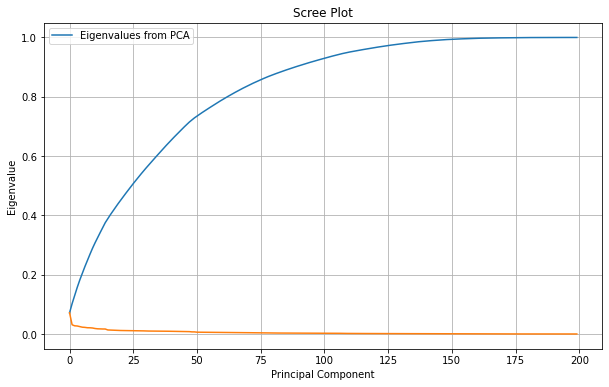

In [17]:
from sklearn.decomposition import PCA
pca = PCA().fit(df.drop(['target','ID_code'], axis=1))

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
plt.grid(True)
plt.show()

####  Observation:
We can observe  the curve representing the  higher information in the dataset which can be achieved by  compressing the 200 variables  into 150 principal components.


In [31]:

from sklearn.decomposition import PCA
pca= PCA(n_components=150)
w= pca.fit_transform(X1)
Pca_df= pd.DataFrame(data= w,columns=list(np.arange(0,150)))
final_df= pd.concat([Pca_df,df.target],axis=1)

### SMOTE + PCA Variables

In [32]:
X2= final_df.drop(['target'],axis=1)
y2= final_df['target']

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
os= SMOTE()

X_train,X_test,y_train,y_test= train_test_split(X2,y2,test_size=.25,random_state=42)

X_train_Os,Y_train_os= os.fit_resample(X_train,y_train)

In [33]:
model_log= LogisticRegression()
modle_LGm= LGBMClassifier()

from time import time
classifier = [LogisticRegression(),LGBMClassifier()]


head = 3
for model in classifier[:head]:
    start = time()
    model.fit(X_train_Os, Y_train_os)
    train_time = time() - start
    start = time()
    y_pred_train = model.predict(X_train)
    y_pred_test=model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tPrecison score test:", precision_score(y_test, y_pred_test))
    print("\tPrecison score train:", precision_score(y_train, y_pred_train))
    print("\t recall score test:", recall_score(y_test, y_pred_test))
    print("\t recall score train:", recall_score(y_train, y_pred_train))
    print("\taccuracy score Test:", accuracy_score(y_test, y_pred_test))
    print("\taccuracy score Train:", accuracy_score(y_train, y_pred_train))
    print("\tClassification report Test:", classification_report(y_test, y_pred_test))
    print("\tCrosstab report Test:", pd.crosstab(y_test, y_pred_test))
    
    print()

                     

LogisticRegression()
	Training time: 8.770s
	Prediction time: 0.129s
	Precison score test: 0.2548197253602111
	Precison score train: 0.2543679107208196
	 recall score test: 0.7357421875
	 recall score train: 0.7426225130190947
	accuracy score Test: 0.75262
	accuracy score Train: 0.7569333333333333
	Classification report Test:               precision    recall  f1-score   support

           0       0.96      0.75      0.85     44880
           1       0.25      0.74      0.38      5120

    accuracy                           0.75     50000
   macro avg       0.61      0.75      0.61     50000
weighted avg       0.89      0.75      0.80     50000

	Crosstab report Test: col_0       0      1
target              
0       33864  11016
1        1353   3767

LGBMClassifier()
	Training time: 27.461s
	Prediction time: 1.801s
	Precison score test: 0.22657072657072658
	Precison score train: 0.3281298014873087
	 recall score test: 0.2521484375
	 recall score train: 0.35645613566564294
	accuracy s

### With PCA Variables


In [35]:

X3=final_df.drop('target',axis=1)
y3=final_df['target']

X_train,X_test,y_train,y_test= train_test_split(X3,y3,test_size=.25,random_state=42)

model_log= LogisticRegression()
modle_LGm= LGBMClassifier()

from time import time
classifier = [LogisticRegression(),LGBMClassifier()]


head = 3
for model in classifier[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred_train = model.predict(X_train)
    y_pred_test=model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tPrecison score test:", precision_score(y_test, y_pred_test))
    print("\tPrecison score train:", precision_score(y_train, y_pred_train))
    print("\t recall score test:", recall_score(y_test, y_pred_test))
    print("\t recall score train:", recall_score(y_train, y_pred_train))
    print("\taccuracy score Test:", accuracy_score(y_test, y_pred_test))
    print("\taccuracy score Train:", accuracy_score(y_train, y_pred_train))
    print("\tClassification report Test:", classification_report(y_test, y_pred_test))
    print("\tCrosstab report Test:", pd.crosstab(y_test, y_pred_test))
    
    print()

                     


LogisticRegression()
	Training time: 3.357s
	Prediction time: 0.121s
	Precison score test: 0.6567060458651841
	Precison score train: 0.6732216557416849
	 recall score test: 0.1845703125
	 recall score train: 0.18513820269728937
	accuracy score Test: 0.90662
	accuracy score Train: 0.90966
	Classification report Test:               precision    recall  f1-score   support

           0       0.91      0.99      0.95     44880
           1       0.66      0.18      0.29      5120

    accuracy                           0.91     50000
   macro avg       0.79      0.59      0.62     50000
weighted avg       0.89      0.91      0.88     50000

	Crosstab report Test: col_0       0    1
target            
0       44386  494
1        4175  945

LGBMClassifier()
	Training time: 21.000s
	Prediction time: 1.793s
	Precison score test: 0.8148148148148148
	Precison score train: 0.9643665158371041
	 recall score test: 0.0515625
	 recall score train: 0.11383362264654827
	accuracy score Test: 0.90168
	ac

#### Observation:
since the data is highly imbalanced and biased towards zero we consider precision score in this use case
actual zero class can be predcited to  class one ,but actual one class should not be predicted to class zero.Those class one observations are very important as those are the customers who will transact in the future ,so we are not going to lose this particular class customer instead we can tell hypothetically that those zero class may do transaction in future,thus we work on the precision score.

we have applied the SMOTE to balance the dataset but the  model has not  improved compared to without  using SMOTE method on  particular dataset. 

###  ROC& AUC Curve

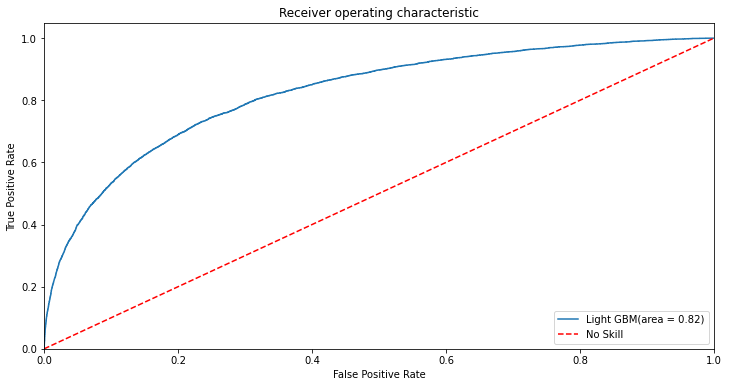

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, modle_LGm.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, modle_LGm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Light GBM(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Lgbm_roc')
plt.show()

In [24]:
def predict_threshold (model,X_test,thresholds):
    #import numpy as np
    return np.where(modle_LGm.predict_proba(X_test)[:,1]>thresholds,1,0)

In [25]:
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.1,0.1):
    y_predict = predict_threshold(modle_LGm,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))
    print("accuracy score for" , thr , "is", accuracy_score(y_test, y_predict))
    print("f1 score ", f1_score(y_test, y_predict))

Threshold : 0.0
[[    0 44880]
 [    0  5120]]
accuracy score for 0.0 is 0.1024
f1 score  0.18577648766328012
Threshold : 0.1
[[32117 12763]
 [ 1175  3945]]
accuracy score for 0.1 is 0.72124
f1 score  0.36146234194612425
Threshold : 0.2
[[41905  2975]
 [ 2804  2316]]
accuracy score for 0.2 is 0.88442
f1 score  0.44491403323407935
Threshold : 0.30000000000000004
[[44082   798]
 [ 3874  1246]]
accuracy score for 0.30000000000000004 is 0.90656
f1 score  0.34785036292573973
Threshold : 0.4
[[44665   215]
 [ 4506   614]]
accuracy score for 0.4 is 0.90558
f1 score  0.2064212472684485
Threshold : 0.5
[[44825    55]
 [ 4860   260]]
accuracy score for 0.5 is 0.9017
f1 score  0.09567617295308188
Threshold : 0.6000000000000001
[[44867    13]
 [ 5018   102]]
accuracy score for 0.6000000000000001 is 0.89938
f1 score  0.03896848137535817
Threshold : 0.7000000000000001
[[44878     2]
 [ 5094    26]]
accuracy score for 0.7000000000000001 is 0.89808
f1 score  0.010101010101010102
Threshold : 0.8
[[4488

### Observation:

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between customers will not  transact and will Transact in future.The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

  ### Pickling

In [28]:
model= LGBMClassifier()
model.fit(X_train,y_train)
y_pred_test= model.predict(X_test)
print(accuracy_score(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

import joblib
joblib.dump(model,'Customer_Transaction_Prediction_Model.pkl')

0.9017
[[44825    55]
 [ 4860   260]]


['Customer_Transaction_Prediction_Model.pkl']